# Uncertainty Analysis Using GP, NLM, and BaCOUn

### Analysis of the paper: [BaCOUn: Bayesian Classifers with Out-of-Distribution Uncertainty](https://arxiv.org/pdf/2007.06096.pdf)



**Team Members:** Qiang Fei, Catharine Wu, Ruochen Zhao, Silin Zou

## Table of Contents

1. Problem Statement
2. Existing Work
3. Contribution
4. Data (Toy data + Mnist)
5. Experiments (GP, NLM, BaCOUn)
6. Evaluation and Interpretation
7. Future Work
8. References

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

## 1. Problem Statement

Traditional classification models focus on producing highly confident models that fit the observed data perfectly, which results in high sensitivity toward data shifts. However, in high-risk domains, we’d like the models to only be confident when we have enough domain knowledge (abundant data) and provide appropriate uncertainty when we don’t so we know when to bring in human expertise to make effective decisions. In this project, we'll experiment different models on different types of data to explore model sensitivity and efficiency on providing uncertainties and distinguishing between aleatoric uncertainty and epistemic uncertainty.

## 2. Existing Work

## TODO

## 3. Contribution

## TODO

## 4. Data Generation

In this section, we'll generate different types of datasets with different out-of-distribution (OOD) shapes.

### 4.1. Well-Seperated and Linearly-Seperable

Here, we are insterested in exploring the effect of different OOD shapes on linearly-seperable data.

In [2]:
# generate 3 classes
X, y = datasets.make_blobs(n_samples=[200,200,200], 
                           centers=[[0, 3], [-3, -3], [3, -3]], 
                           cluster_std=0.9, 
                           n_features=2, 
                           random_state=0)

In [3]:
# generate OOD
np.random.seed(0)
r = 6.8 # radius
x1, x2 = [], []
for _ in range(500):
    # random angle
    angle = np.random.uniform(0,2 * np.pi)
    x1.append((r + random.random())*np.cos(angle))
    x2.append(-.5+(r + random.random())*np.sin(angle))

#### a) ODD: complete ring

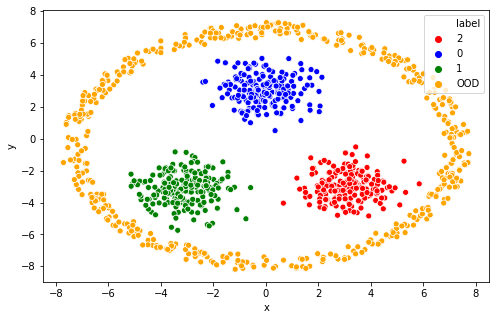

In [4]:
df1a = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df1a_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD'))
df1a = df1a.append(df1a_ood, ignore_index=True)

plt.figure(figsize=[8,5])
sns.scatterplot(data=df1a, x="x", y="y", hue="label", palette=["red", "blue", "green", "orange"]);

#### b) OOD: semicircle

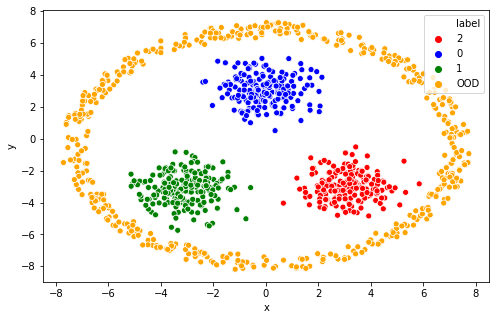

In [5]:
df1b = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df1b_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD'))
df1b = df1b.append(df1b_ood, ignore_index=True)

plt.figure(figsize=[8,5])
sns.scatterplot(data=df1b, x="x", y="y", hue="label", palette=["red", "blue", "green", "orange"]);

#### c) Incomplete OOD (w/ holes)

In [6]:
# generate OOD
np.random.seed(0)
r = 6.8 # radius
x1, x2 = [], []
angles = np.random.uniform(0,2 * np.pi, 50)

for _ in range(500):
    # random angle
    angle = np.random.choice(angles)
    x1.append((r + random.random())*np.cos(angle))
    x2.append(-.5+(r + random.random())*np.sin(angle))

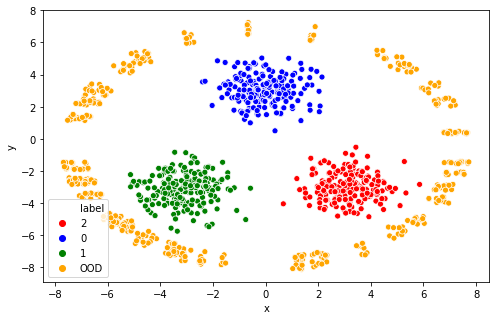

In [7]:
df1c = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df1c_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD')).sample(500, random_state = 0)
df1c = df1c.append(df1c_ood, ignore_index=True)

plt.figure(figsize=[8,5])
sns.scatterplot(data=df1c, x="x", y="y", hue="label", palette=["red", "blue", "green", "orange"]);

### 4.2. Well-Seperated and Linearly-Seperable, but clusters are far away from each other

We are interested in exploring whether the points in between far-away clusters should be considered as OOD.

In [8]:
# generate 3 classes
X, y = datasets.make_blobs(n_samples=[200,200,200], 
                           centers=[[0, 6], [-6, -6], [6, -6]], 
                           cluster_std=1, 
                           n_features=2, 
                           random_state=0)

#### a) one ODD boundary
Between-cluster points are not OOD.

In [9]:
# generate OOD
np.random.seed(0)
r = 11.5 # radius
x1, x2 = [], []
for _ in range(500):
    # random angle
    angle = np.random.uniform(0,2 * np.pi)
    x1.append((r + random.random())*np.cos(angle))
    x2.append(-1+(r + random.random())*np.sin(angle))

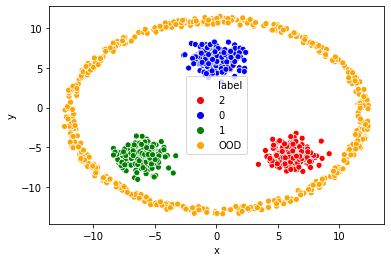

In [10]:
df2a = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df2a_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD'))
df2a = df2a.append(df2a_ood, ignore_index=True)

sns.scatterplot(data=df2a, x="x", y="y", hue="label", palette=["red", "blue", "green", "orange"]);

#### b) three ODD boundary
Between-cluster points are OOD.

In [11]:
# generate OOD
np.random.seed(42)
r = 3.5 # radius
cx1, cx2, cx3 = 0, -6, 6
cy1, cy2, cy3 = 6, -6, -6
x1, x2 = [], []
for _ in range(500//3):
    # random angle
    angle = np.random.uniform(0,2 * np.pi)
    x1.append(cx1 + (r + random.random())*np.cos(angle))
    x1.append(cx2 + (r + random.random())*np.cos(angle))
    x1.append(cx3 + (r + random.random())*np.cos(angle))
    x2.append(cy1 + (r + random.random())*np.sin(angle))
    x2.append(cy2 + (r + random.random())*np.sin(angle))
    x2.append(cy3 + (r + random.random())*np.sin(angle))

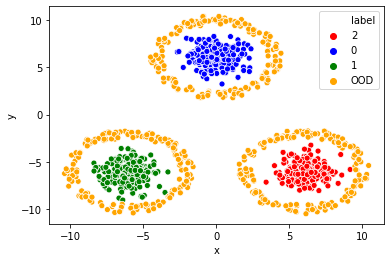

In [12]:
df2b = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df2b_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD'))
df2b = df2b.append(df2b_ood, ignore_index=True)

sns.scatterplot(data=df2b, x="x", y="y", hue="label", palette=["red", "blue", "green", "orange"]);

### 4.3. Not Well-Seperated
Here we explore the effect of overlapping clusters.

In [13]:
# generate 3 classes
X, y = datasets.make_blobs(n_samples=[200,200,200], 
                           centers=[[0, 1], [-1, -1], [1, -1]], 
                           cluster_std=1, 
                           n_features=2, 
                           random_state=0)

In [14]:
# generate OOD
np.random.seed(42)
r = 4.5 # radius
x1, x2 = [], []
for _ in range(500):
    # random angle
    angle = np.random.uniform(0,2 * np.pi)
    x1.append((r + random.random())*np.cos(angle))
    x2.append((r + random.random())*np.sin(angle))

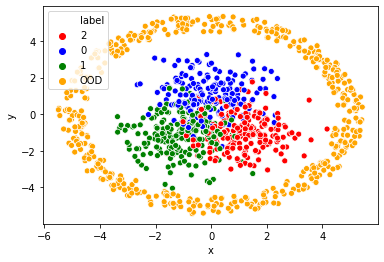

In [15]:
df3 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df3_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD'))
df3 = df3.append(df3_ood, ignore_index=True)

sns.scatterplot(data=df3, x="x", y="y", hue="label", palette=["red", "blue", "green", "orange"]);

### 4.4. Well-Seperated by non-linear boundary

In [16]:
X, y = datasets.make_moons(n_samples=600, shuffle=True, noise=0.1, random_state=0)

In [17]:
# generate OOD
np.random.seed(0)
r = 2 # radius
x1, x2 = [], []
for _ in range(500):
    # random angle
    angle = np.random.uniform(0,2 * np.pi)
    x1.append(.5+(r + random.random())*np.cos(angle))
    x2.append(.3+(r + random.random())/1.5*np.sin(angle))

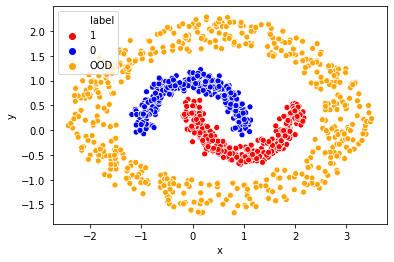

In [18]:
df4 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df4_ood = pd.DataFrame(dict(x=x1, y=x2, label='OOD'))
df4 = df4.append(df4_ood, ignore_index=True)

sns.scatterplot(data=df4, x="x", y="y", hue="label", palette=["red", "blue", "orange"]);

### 4.5. MNIST
Now we use a real dataset: MNIST, we take samples from digits 0,1,2 as in-distribution data, and sample from the digit 3 as OOD.

In [19]:
# Load data from https://www.openml.org/d/554
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [20]:
# Pick out 3 classes of digits: 0, 1, 2 and take a subset of samples as in-distribution points
X_0, y_0 = X[(y == '0')][:500], y[(y == '0')][:500].astype(int)
X_1, y_1 = X[(y == '1')][:500], y[(y == '1')][:500].astype(int)
X_2, y_2 = X[(y == '2')][:500], y[(y == '2')][:500].astype(int)
# sample from digit 3 as OODs
X_ood, y_ood = X[(y == '3')][:500], ['OOD'] * 500

In [21]:
len(np.concatenate((X_0, X_1, X_2)))

1500

In [22]:
# combine data
X_mnist = np.concatenate((X_0, X_1, X_2, X_ood))
y_mnist = np.concatenate((y_0, y_1, y_2, y_ood))

Visualize the data in two dimensions (TSNE)

In [23]:
vis_df = pd.DataFrame(X_mnist)
vis_df['y'] = y_mnist

tsne_results = TSNE(n_components=2, random_state=207).fit_transform(X_mnist)

vis_df['tsne-2d-one'] = tsne_results[:,0]
vis_df['tsne-2d-two'] = tsne_results[:,1]

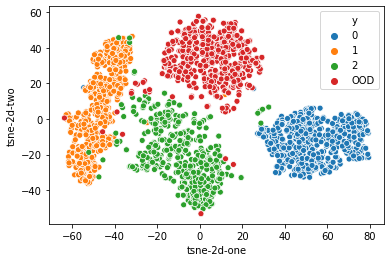

In [24]:
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y", data=vis_df, legend="full");

## 5. Experiment

### 5.1 Gaussian Processes (GP)

### 5.2 Neural Linear Models (NLM)

### 5.3 Bayesian Classifers with Out-of-Distribution Uncertainty (BaCOUn)

## 6. Evaluation and Interpretation

### 6.1 Gaussian Processes (GP)

### 6.2 Neural Linear Models (NLM)

### 6.3 Bayesian Classifers with Out-of-Distribution Uncertainty (BaCOUn)

## 7. Future Work

## 8. References